In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
cd "/content/drive/MyDrive/apple_variety"

/content/drive/MyDrive/apple_variety


In [4]:
pip install tensorflow==2.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.2
    Uninstalling tensorflow-2.16.2:
      Successfully uninstalled tensorflow-2.16.2


In [9]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model
model = load_model("fresh_try_pommelogy.keras")

In [11]:
from tensorflow.keras.models import load_model

# If you have custom layers, pass them in the custom_objects dictionary
model = load_model('fresh_try_pommelogy.keras')


In [13]:
print(model.get_weights()[0])


[[[[ 1.53770875e-02 -5.40808626e-02 -7.76792094e-02  6.53497055e-02
    -1.30671322e-01 -1.39003351e-01  4.17942777e-02 -2.37270892e-02
    -1.20619230e-01  4.62563075e-02 -2.37447843e-02 -4.60508950e-02
     3.19265611e-02  1.36005431e-01 -7.72295073e-02  2.59177163e-02
     3.19346786e-02  1.46346837e-02 -2.86140125e-02 -1.66173875e-02
    -8.79871324e-02 -1.11924596e-01  1.01852179e-01  7.38446414e-02
     7.39699379e-02 -8.45431760e-02 -7.02089518e-02 -1.15317978e-01
    -7.02398866e-02 -4.17632870e-02 -1.39349531e-02 -1.45006627e-01]
   [ 1.34705499e-01  1.20103665e-01 -1.14379048e-01  1.45430434e-02
    -6.34591430e-02 -4.68996391e-02  3.74955684e-02  3.60811837e-02
    -1.65089942e-03 -1.04522176e-01  1.19989306e-01 -3.66916992e-02
    -2.26191692e-02  8.64602327e-02 -1.07548460e-01  3.58359814e-02
    -6.14920817e-02 -9.22833458e-02 -1.49115995e-02  3.99685167e-02
    -1.48918331e-01 -8.98071527e-02 -2.83088777e-02  7.97480494e-02
    -5.60583659e-02  2.65187286e-02  2.00687815

In [14]:
# print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [ ]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import cv2 as cv
from PIL import Image


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
from google.colab import files
fileImg = files.upload()
image_path = next(iter(fileImg.keys()))

Saving 20f8211d11510110522c0d3a1c2f65fc.jpg to 20f8211d11510110522c0d3a1c2f65fc.jpg


In [ ]:
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Assuming your model was trained on images scaled to [0, 1]
    return img_array

1/1 [==============================] - 0s 92ms/step
Predicted class: golden_2 with confidence: 0.07475915551185608


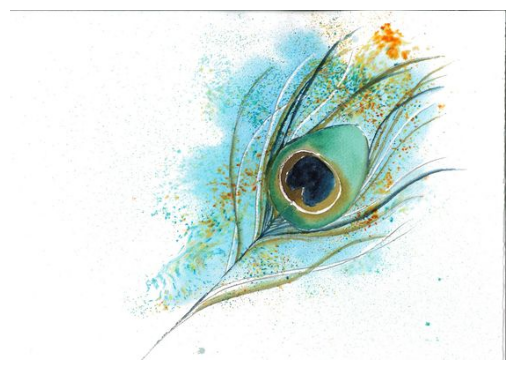

In [ ]:
class_names = ["apple", "braeburn", "crimson_snow", "fuji", "gala", "golden_1", "golden_2", "golden_delicious", "granny_smith", "gravensteins_banks", "hit", "honey_crisp", "mcintosh", "pink_lady", "red_1", "red_2", "red_3", "red_delicious", "red_yellow", "ruby"]
# Step 5: Predict the class
for fn in fileImg.keys():
    img_path = fn
    img = preprocess_image(img_path)
    predictions = model.predict(img)

    # Assuming your model's output is a softmax array of class probabilities
    class_index = np.argmax(predictions)
    class_confidence = np.max(predictions)

    print(f'Predicted class: {class_names[class_index]} with confidence: {class_confidence}')

    # Optional: Display the image
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
